# 1. Problem

The problem  revolves around content personalization on social media platforms. Users often encounter content that does not match their interests, leading to dissatisfaction and reduced engagement. This issue is typically caused by algorithms that struggle to accurately personalize content based on individual preferences, resulting in a disconnect between the displayed content and the user's interests.nds.

# 2. Data Mining Task

Objective:
The objective is to predict or recommend content items (posts, articles, videos, etc.) that are likely to be of interest to individual users, based on their past interactions and behavior on the platform.

Dataset:
The dataset consists of user interactions with content items, including likes, shares, comments, views, and other relevant engagement metrics. Each data point includes the user ID, content ID, timestamp, and possibly other metadata about the content and the user.

Task:
Classification Approach:
Input: User interactions with content items.
Output: A binary classification (interested/not interested) or multi-class classification (interested in category A, B, C, etc.) for each user-content pair.
Algorithm: Machine learning algorithms such as logistic regression, decision trees, or neural networks can be used for this ta

Impact:
Successful implementation of an effective content personalization system can lead to increased user engagement, longer session durations, higher user satisfaction, and ultimately, increased platform loyalty and revenue.sk.

# 3. Data

### General Information About The Dataset:
[source of dataset](https://www.kaggle.com/datasets/imyjoshua/average-time-spent-by-a-user-on-social-media)

- Number of object : 668
- Number of attributes : 12
- class name: interests

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean
from sklearn.preprocessing import MinMaxScaler


In [3]:
#  Load the dataset and dataframe

df=pd.read_csv('dummy_data_p326_2.csv')
df1=pd.DataFrame(df)
print(df1)


     age  gender  time_spent   platform  interests        location  \
0     56    male           3  Instagram     Sports  United Kingdom   
1     46  female           2   Facebook     Travel  United Kingdom   
2     32    male           8  Instagram     Sports       Australia   
3     25    male           1  Instagram  Lifestlye       Australia   
4     38    male           3   Facebook     Travel   United States   
..   ...     ...         ...        ...        ...             ...   
663   50  female           9    YouTube     Travel       Australia   
664   23  female           3    YouTube  Lifestlye   United States   
665   22  female           8  Instagram  Lifestlye  United Kingdom   
666   61  female           4    YouTube     Sports       Australia   
667   19  female           8    YouTube     Travel       Australia   

    demographics         profession  income  indebt  isHomeOwner  Owns_Car  
0          Urban  Software Engineer   19774    True        False     False  
1    

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           668 non-null    int64 
 1   gender        668 non-null    object
 2   time_spent    668 non-null    int64 
 3   platform      668 non-null    object
 4   interests     668 non-null    object
 5   location      668 non-null    object
 6   demographics  668 non-null    object
 7   profession    668 non-null    object
 8   income        668 non-null    int64 
 9   indebt        668 non-null    bool  
 10  isHomeOwner   668 non-null    bool  
 11  Owns_Car      668 non-null    bool  
dtypes: bool(3), int64(3), object(6)
memory usage: 33.3+ KB
None


In [5]:
#Number of columns
num_attributes = len(df.columns)
print("Number of attributes:", num_attributes)

Number of attributes: 12


In [6]:
#Number of rows
num_rows = len(df)
print("Number of objects:", num_rows)

Number of objects: 668


In [7]:
attribute_types = df.dtypes

print("Data types of attributes:")
print(attribute_types)

Data types of attributes:
age              int64
gender          object
time_spent       int64
platform        object
interests       object
location        object
demographics    object
profession      object
income           int64
indebt            bool
isHomeOwner       bool
Owns_Car          bool
dtype: object


| Attribute       | Description                                                                             | Data Type | Range                          |
|-----------------|-----------------------------------------------------------------------------------------|-----------|--------------------------------|
| Age             | The age of the user.                                                                    | int64     | 18-64                          |
| Gender          | The gender identity of the user (Male, Female)                                          | object    | Female(0), Male(1)            |
| Time Spent      | Amount of time spent on social media by the user (hours).                               | int64     | Low (1-3), Medium (4-6), High (7-9) |
| Platform        | The social media platform where the user spends time.                                   | object    |                                |
| Interests       | The user's primary area of interest or hobby.                                           | object    |                                |
| Location        | The country of residence for the user.                                                  | object    |                                |
| Demographics    | The type of area the user resides in (Urban, Suburban, Rural).                          | object    |                                |
| Profession      | The user's occupation or professional status.                                           | object    |                                |
| Income          | The yearly income of the user.                                                          | int64     | 10000-20000                    |
| Indebt          | Indicates whether the user is in debt (True or False).                                  | boolean   | True or False                  |
| Is Home Owner   | Indicates whether the user owns a home (True or False).                                 | boolean   | True or False                  |
| Owns Car        | Indicates whether the user owns cars (True or False).                                   | boolean   | True or False                  |

### Distributions of attributes:

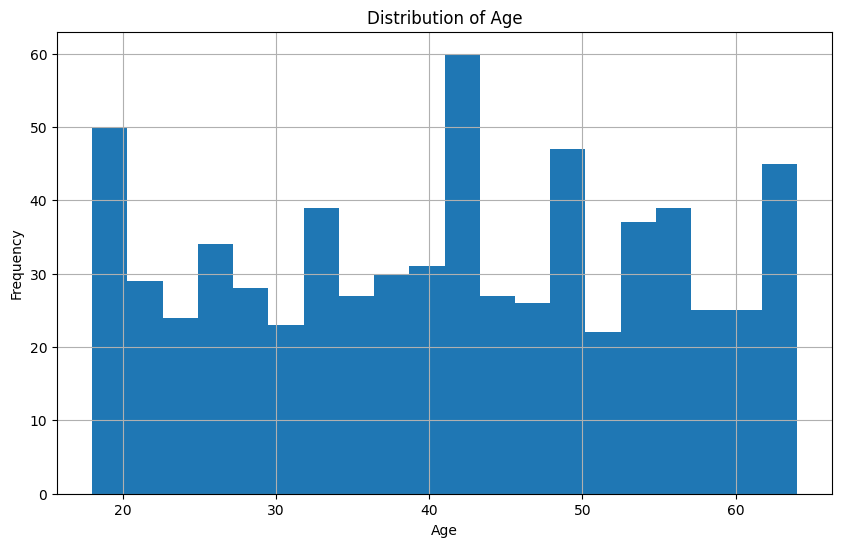

In [8]:
df['age'].plot(kind='hist', bins=20, figsize=(10, 6))
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

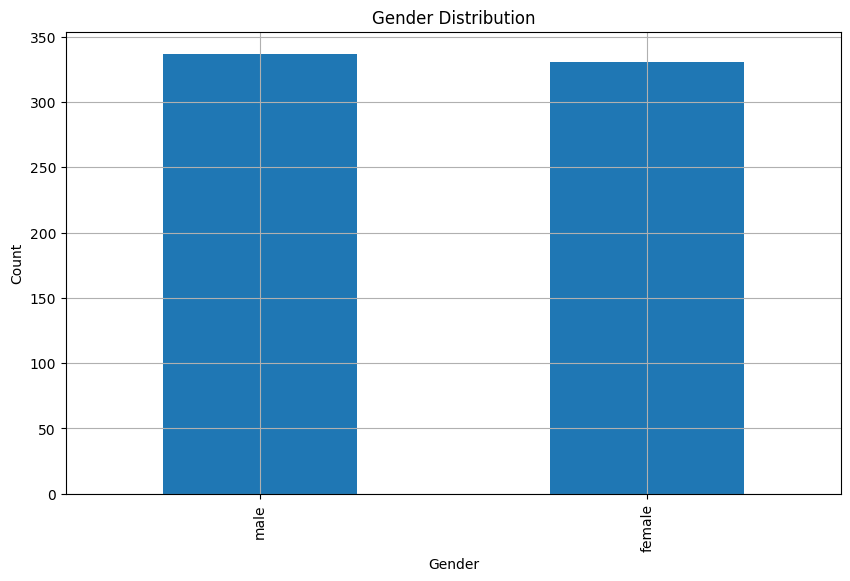

In [9]:
# Design bar plots to display categorical data insights
plt.figure(figsize=(10, 6))
df['gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(True)
plt.show()


### Missing Values :

In [10]:
#check if there is missing value:
missing_values = df.isnull()
print(missing_values)

missing_values_sum= df.isna().sum()
print(missing_values_sum)


#Remove rows with missing data(NaN) 
df_cleaned = df.dropna()

#Display The cleaned dataframe
print("/nDataFrame after removing rows rows with missing data:")
print(df_cleaned )

       age  gender  time_spent  platform  interests  location  demographics  \
0    False   False       False     False      False     False         False   
1    False   False       False     False      False     False         False   
2    False   False       False     False      False     False         False   
3    False   False       False     False      False     False         False   
4    False   False       False     False      False     False         False   
..     ...     ...         ...       ...        ...       ...           ...   
663  False   False       False     False      False     False         False   
664  False   False       False     False      False     False         False   
665  False   False       False     False      False     False         False   
666  False   False       False     False      False     False         False   
667  False   False       False     False      False     False         False   

     profession  income  indebt  isHomeOwner  Owns_

Description of the Plot:

The x-axis represents the 'attribute' values.
The y-axis represents the frequency of occurrence of each attribute range.

Information from the Plot:

The histogram provides insight into the distribution of attribute levels in the dataset.
It shows the frequency or count of individuals falling into different attribute brackets.

Decision for Data Preprocessing:

The shape of the histogram can indicate whether the data needs preprocessing. For example, if the histogram is skewed or has outliers, it may indicate the need for data transformation or outlier removal.
If the histogram shows a highly skewed distribution or if there are a large number of outliers, it suggests that the data may need preprocessing before further analysis or modeling. This could include normalization, standardization, or outlier detection/removal techniques.


In [11]:
# Select the 'age' 
age_column = df['age']
# Calculate the mean of the 'age' column
mean_age = age_column.mean()
# Calculate the absolute differences from the mean
differences_from_mean = abs(age_column - mean_age)
# Find the index of the row with the largest difference from the mean
max_difference_index = differences_from_mean.idxmax()
# Remove the row with the largest difference from the mean
df_no_outlier = df.drop(max_difference_index)
# Display the original DataFrame and the DataFrame after removing the row with the largest difference
#from the mean
print("Original DataFrame:")
print(df)
print("\nDataFrame after removing the row with the largest difference from the mean:")
print(df_no_outlier)

Original DataFrame:
     age  gender  time_spent   platform  interests        location  \
0     56    male           3  Instagram     Sports  United Kingdom   
1     46  female           2   Facebook     Travel  United Kingdom   
2     32    male           8  Instagram     Sports       Australia   
3     25    male           1  Instagram  Lifestlye       Australia   
4     38    male           3   Facebook     Travel   United States   
..   ...     ...         ...        ...        ...             ...   
663   50  female           9    YouTube     Travel       Australia   
664   23  female           3    YouTube  Lifestlye   United States   
665   22  female           8  Instagram  Lifestlye  United Kingdom   
666   61  female           4    YouTube     Sports       Australia   
667   19  female           8    YouTube     Travel       Australia   

    demographics         profession  income  indebt  isHomeOwner  Owns_Car  
0          Urban  Software Engineer   19774    True        Fal

In [12]:
#five number summary,
summary_statistics=df.describe();
print(summary_statistics);


              age  time_spent       income
count  668.000000  668.000000    668.00000
mean    41.163174    5.004491  15051.50000
std     13.529534    2.561094   2980.63526
min     18.000000    1.000000  10021.00000
25%     30.000000    3.000000  12418.75000
50%     42.000000    5.000000  14956.50000
75%     53.000000    7.000000  17768.50000
max     64.000000    9.000000  19969.00000


 The displayed results represent the variances for each variable in the data. Variance is a measure of the spread of values around the mean in a dataset. Here's a concise description of each variable:

 - age: The variance value for the age variable. The high variance indicates a significant dispersion of age values among individuals in the data.
 - time_spent: The variance value for the time spent variable. The low variance suggests that individuals tend to spend a similar amount of time on average.
 - income: The variance value for the income variable. The high variance indicates a large spread of income values among individuals in the data.
 - indebt: The variance value for the debt variable. The low variance suggests that individuals tend to have a similar level of debt on average.
 - isHomeOwner: The variance value for the home ownership variable. The low variance indicates a relatively homogeneous distribution of home ownership among individuals.
 - Owns_Car: The variance value for the car ownership variable. The low variance suggests a relatively homogeneous distribution of car ownership among individuals.

 Variance values give us an idea of the data dispersion and how much it deviates from the mean. High variance values indicate significant variability and a wide range of values, while low variance values indicate less spread and a more homogeneous distribution of values.




### plotting methods

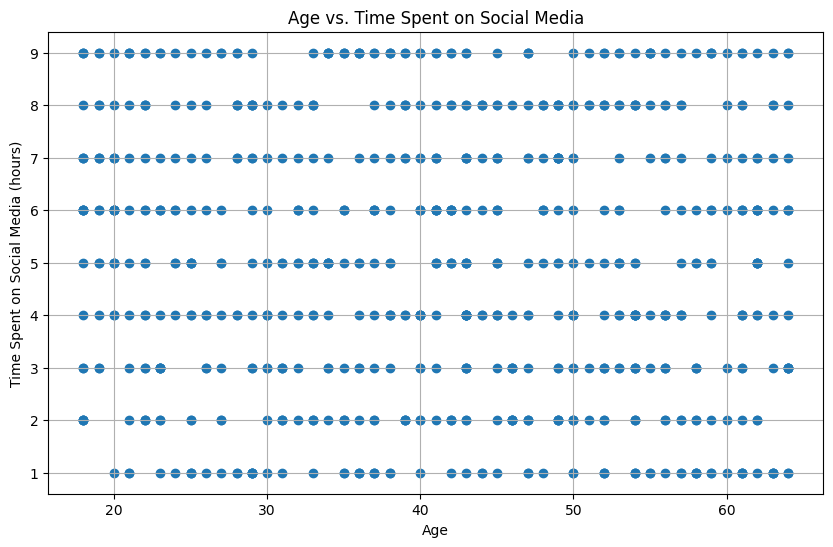

In [13]:
#A-Scatter:
# Age vs. Time Spent on Social Media scatter plots

plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['time_spent'])
plt.title('Age vs. Time Spent on Social Media')
plt.xlabel('Age')
plt.ylabel('Time Spent on Social Media (hours)')
plt.grid(True)
plt.show()

This scatterplot helps us to determine whether the age and time spint are corelated to each other
or not, it shows that the two attributes are not corelated and has no proportional relationship.

In [14]:
#B-boxplot:
import numpy as np

Q1 = df['time_spent'].quantile(0.25)
Q3 = df['time_spent'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df['time_spent'] > lower_bound) & (df['time_spent'] < upper_bound)]


In [15]:
median = df['time_spent'].median()
df['time_spent'] = np.where((df['time_spent'] < lower_bound) | (df['time_spent'] > upper_bound), median, df['time_spent'])


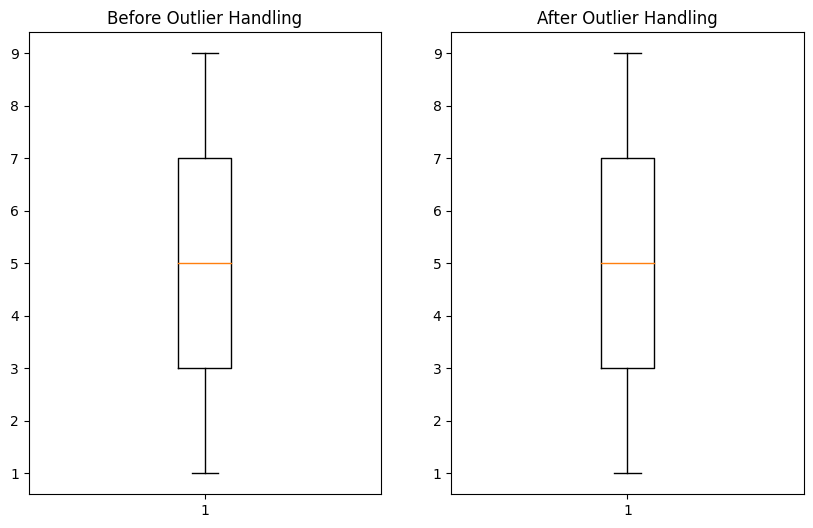

In [16]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df['time_spent'])
plt.title('Before Outlier Handling')

plt.subplot(1, 2, 2)
plt.boxplot(df_filtered['time_spent'])
plt.title('After Outlier Handling')
plt.show()


The time spent boxplot illustrates that there are littel outliers in time spent attribute, and it shows the 4 
range of the time spent which might lead to conflicts in calculations and need transformation to make the time 
spent fall within a smaller and common range.

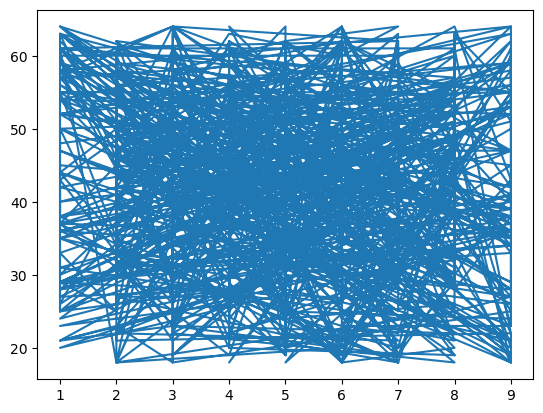

In [17]:
#C-Plot:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(df['time_spent'] , df['age'] )
plt.show()

The plot represents the coorelation between the age and time spent, and in my opinion it's different from age to 
age and time spent and there is not specified age with time spint 

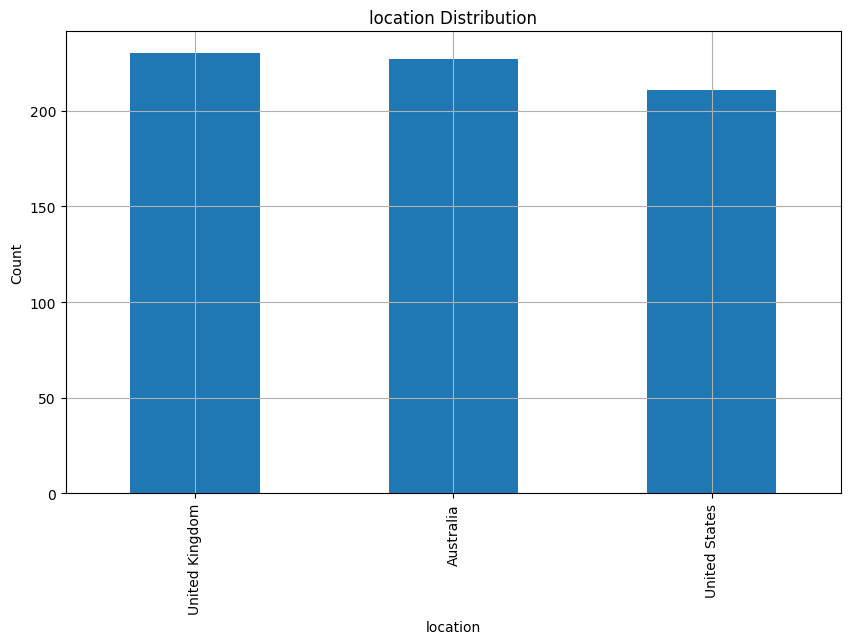

In [18]:
#D-Bar:
plt.figure(figsize=(10, 6))
df['location'].value_counts().plot(kind='bar')
plt.title('location Distribution')
plt.xlabel('location')
plt.ylabel('Count')
plt.grid(True)
plt.show()

The Bar plot represents the total locations measures in the dataset.
It indicates that most of the users lives in UK which reflects on their personalization on social media platforms.

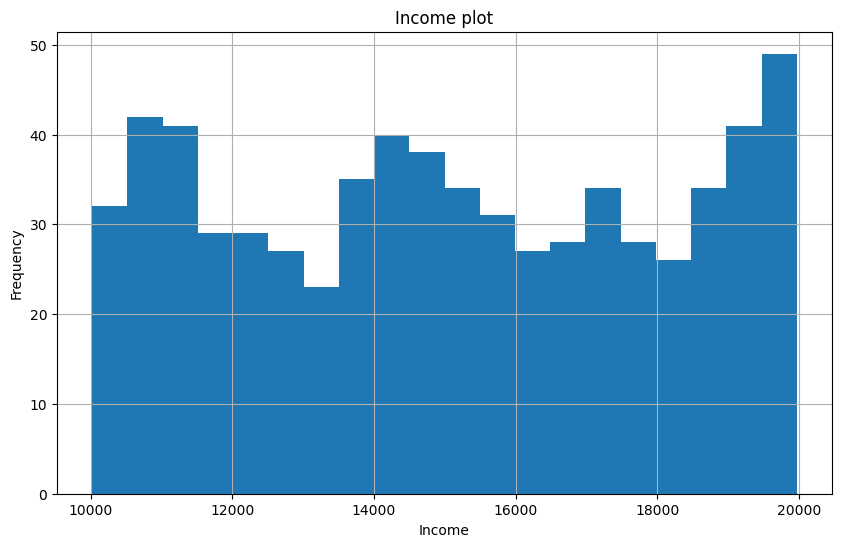

In [19]:
#E-Histogram:
df['income'].plot(kind='hist', bins=20, figsize=(10, 6))
plt.title('Income plot')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The histogram represents the frequency of users’ income in the dataset.
After observation, we noticed that the most values lie in the normal range, which is approximately from 19500 to 20000, but also it illustrates there is an outliers in the dataset.

## Data preprocessing 

We chose to apply data preprocessing to ensure the quality and reliability of our analysis results. By handling missing values and standardizing numerical values, we aim to prepare the data for further analysis or modeling.


1. Handling Missing Values: Missing values can lead to biased analysis and reduce the effectiveness of machine learning models. By filling missing values in the 'gender' column with the mode and in the 'interests' column with 'Other', we ensure that all available data is utilized and avoid introducing bias into the analysis.

2. Encoding Categorical Variables (Label Encoding): Machine learning models require numerical input, so we used Label Encoding to convert the categorical values in the 'gender' column to numerical values. This allows us to include these variables in our analysis without introducing bias or errors.

3. Discretization (Binning): Discretizing the 'time_spent' column into three bins ('Low', 'Medium', 'High') can help simplify the analysis and interpretation of the data. It can also make the data more suitable for certain types of analysis or modeling techniques.

4. Normalization (Decimal Scaling): Normalizing the 'age' and 'income' columns using Decimal Scaling ensures that all features are on a similar scale. This can improve the performance of machine learning algorithms, particularly those sensitive to the scale of the input variables.

Overall, these preprocessing techniques help ensure that the data is clean, consistent, and in a format that is suitable for analysis, which ultimately improves the quality and reliability of the analysis results.





.













### - handling the missing values and outlier detection

In [25]:
#check if there is missing values:
missing_values = df.isnull()
print(missing_values)

missing_values_sum= df.isna().sum()
print(missing_values_sum)


#Remove rows with missing data(NaN) 
df_cleaned = df.dropna()

#Display The cleaned dataframe
print("/nDataFrame after removing rows rows with missing data:")
print(df_cleaned )

       age  gender  time_spent  platform  interests  location  demographics  \
0    False   False       False     False      False     False         False   
1    False   False       False     False      False     False         False   
2    False   False       False     False      False     False         False   
3    False   False       False     False      False     False         False   
4    False   False       False     False      False     False         False   
..     ...     ...         ...       ...        ...       ...           ...   
663  False   False       False     False      False     False         False   
664  False   False       False     False      False     False         False   
665  False   False       False     False      False     False         False   
666  False   False       False     False      False     False         False   
667  False   False       False     False      False     False         False   

     profession  income  indebt  isHomeOwner  Owns_

Missing and null values can significantly impact the quality and reliability of the analysis results, which is why it's important to properly handle them during data preprocessing. They can lead to biased analysis, reduced sample size, incorrect results, and impact the performance of machine learning models.







In [26]:
## check the outliers
# Select the 'age' 
age_column = df['age']
# Calculate the mean of the 'age' column
mean_age = age_column.mean()
# Calculate the absolute differences from the mean
differences_from_mean = abs(age_column - mean_age)
# Find the index of the row with the largest difference from the mean
max_difference_index = differences_from_mean.idxmax()
# Remove the row with the largest difference from the mean
df_no_outlier = df.drop(max_difference_index)
# Display the original DataFrame and the DataFrame after removing the row with the largest difference
#from the mean
print("Original DataFrame:")
print(df)
print("\nDataFrame after removing the row with the largest difference from the mean:")
print(df_no_outlier)

Original DataFrame:
     age  gender  time_spent   platform  interests        location  \
0     56    male         3.0  Instagram     Sports  United Kingdom   
1     46  female         2.0   Facebook     Travel  United Kingdom   
2     32    male         8.0  Instagram     Sports       Australia   
3     25    male         1.0  Instagram  Lifestlye       Australia   
4     38    male         3.0   Facebook     Travel   United States   
..   ...     ...         ...        ...        ...             ...   
663   50  female         9.0    YouTube     Travel       Australia   
664   23  female         3.0    YouTube  Lifestlye   United States   
665   22  female         8.0  Instagram  Lifestlye  United Kingdom   
666   61  female         4.0    YouTube     Sports       Australia   
667   19  female         8.0    YouTube     Travel       Australia   

    demographics         profession  income  indebt  isHomeOwner  Owns_Car  
0          Urban  Software Engineer   19774    True        Fal

We calculate the mean age from the 'Age' column to determine a central value for comparison. Next, we compute the absolute differences between each age and the mean age to identify outliers. We then locate the row with the largest difference, indicating a potential outlier, and remove it from the DataFrame. Finally, we display both the original DataFrame and the modified DataFrame without the outlier, allowing us to observe the effect of the removal on the dataset.







In [27]:
# Select the 'time_spent' 
time_spent_col = df['time_spent']
# Calculate the mean of the 'time' column

mean_time = time_spent_col.mean()
# Calculate the absolute differences from the mean
differences_from_mean1 = abs(time_spent_col - mean_time)
# Find the index of the row with the largest difference from the mean
max_difference_index1 = differences_from_mean.idxmax()
# Remove the row with the largest difference from the mean
df_no_outlier1 = df.drop(max_difference_index1)
# Display the original DataFrame and the DataFrame after removing the row with the largest difference
#from the mean
print("Original DataFrame:")
print(df)
print("\nDataFrame after removing the row with the largest difference from the mean:")
print(df_no_outlier1)

Original DataFrame:
     age  gender  time_spent   platform  interests        location  \
0     56    male         3.0  Instagram     Sports  United Kingdom   
1     46  female         2.0   Facebook     Travel  United Kingdom   
2     32    male         8.0  Instagram     Sports       Australia   
3     25    male         1.0  Instagram  Lifestlye       Australia   
4     38    male         3.0   Facebook     Travel   United States   
..   ...     ...         ...        ...        ...             ...   
663   50  female         9.0    YouTube     Travel       Australia   
664   23  female         3.0    YouTube  Lifestlye   United States   
665   22  female         8.0  Instagram  Lifestlye  United Kingdom   
666   61  female         4.0    YouTube     Sports       Australia   
667   19  female         8.0    YouTube     Travel       Australia   

    demographics         profession  income  indebt  isHomeOwner  Owns_Car  
0          Urban  Software Engineer   19774    True        Fal

we went through the same process above but this time we applied it to the "time_spent" column

In [28]:
# Select the 'income' 
income_col = df['income']
## Calculate the mean of the 'income' column

mean_income = income_col.mean()
# Calculate the absolute differences from the mean
differences_from_mean2 = abs(income_col - mean_income)
# Find the index of the row with the largest difference from the mean
max_difference_index2 = differences_from_mean.idxmax()
# Remove the row with the largest difference from the mean
df_no_outlier2 = df.drop(max_difference_index2)
# Display the original DataFrame and the DataFrame after removing the row with the largest difference
#from the mean
print("Original DataFrame:")
print(df)
print("\nDataFrame after removing the row with the largest difference from the mean:")
print(df_no_outlier2)

df.to_csv('dataPreprocessing', index=False)


Original DataFrame:
     age  gender  time_spent   platform  interests        location  \
0     56    male         3.0  Instagram     Sports  United Kingdom   
1     46  female         2.0   Facebook     Travel  United Kingdom   
2     32    male         8.0  Instagram     Sports       Australia   
3     25    male         1.0  Instagram  Lifestlye       Australia   
4     38    male         3.0   Facebook     Travel   United States   
..   ...     ...         ...        ...        ...             ...   
663   50  female         9.0    YouTube     Travel       Australia   
664   23  female         3.0    YouTube  Lifestlye   United States   
665   22  female         8.0  Instagram  Lifestlye  United Kingdom   
666   61  female         4.0    YouTube     Sports       Australia   
667   19  female         8.0    YouTube     Travel       Australia   

    demographics         profession  income  indebt  isHomeOwner  Owns_Car  
0          Urban  Software Engineer   19774    True        Fal

we applied the same process to the "income" column

in general, we identified all outliers in the numeric attributes. then we deleted the rows where we find the outliers to produce more accurate dataset that help us to get more accurate results later, finally we checked again to make sure all outliers have been deleted then delete the new outliers that occurred because of the IQR change after deleting the rows in the second step

### - Encoding Categorical Variables 

We used encoding to convert the categorical 'gender' column ('Male' and 'Female') into numerical values. This conversion is necessary for machine learning models to interpret the data, as most models require numerical input. .

In [29]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load data
df = pd.read_csv('dummy_data_p326_2.csv')

# Print original DataFrame
print("Original DataFrame:")
print(df)

# Apply Label Encoding to 'gender' column
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

# Print modified DataFrame
print("\nDataFrame after Label Encoding:")
print(df)

# Save the modified DataFrame to CSV
df.to_csv('dataPreprocessing.csv', index=False)

Original DataFrame:
     age  gender  time_spent   platform  interests        location  \
0     56    male           3  Instagram     Sports  United Kingdom   
1     46  female           2   Facebook     Travel  United Kingdom   
2     32    male           8  Instagram     Sports       Australia   
3     25    male           1  Instagram  Lifestlye       Australia   
4     38    male           3   Facebook     Travel   United States   
..   ...     ...         ...        ...        ...             ...   
663   50  female           9    YouTube     Travel       Australia   
664   23  female           3    YouTube  Lifestlye   United States   
665   22  female           8  Instagram  Lifestlye  United Kingdom   
666   61  female           4    YouTube     Sports       Australia   
667   19  female           8    YouTube     Travel       Australia   

    demographics         profession  income  indebt  isHomeOwner  Owns_Car  
0          Urban  Software Engineer   19774    True        Fal

### - Discretization 

We used Discretization here to categorize the 'time_spent' column into three levels ('Low', 'Medium', 'High') where low being from(1-3), medium being form (4-6) and high being from (7-9). This transformation simplifies the data, making i easier to interpret and analyze. It also helps normalize the data and can improve the performance

In [30]:
import pandas as pd
data = pd.read_csv('dummy_data_p326_2.csv')
df = pd.DataFrame(data)

# Discretiztion for a specific column ('time_spent')
columns_to_discretize='time_spent'
num_bins = 3
labels = ['Low', 'Medium', 'High']

# Perform Discretiztion  using the cut function 
df['discretized_'+columns_to_discretize] = pd.cut(df[columns_to_discretize], bins=num_bins,labels=labels)
print("Original DataFRame:")
print(df[['time_spent','discretized_time_spent']])
df.to_csv('dataPreprocessing.csv', index=False, columns=['discretized_time_spent'])


Original DataFRame:
     time_spent discretized_time_spent
0             3                    Low
1             2                    Low
2             8                   High
3             1                    Low
4             3                    Low
..          ...                    ...
663           9                   High
664           3                    Low
665           8                   High
666           4                 Medium
667           8                   High

[668 rows x 2 columns]


### - Normalization

We used Normalization to standardize the 'time_spent','age','income' columns so that all values are on a similar scale. This helps machine learning algorithms treat all features equally and prevents issues related to scale differences.



In [31]:
# Extract columns to normalize
columns_to_normalize = ['time_spent','age','income']
data_to_normalize = df[columns_to_normalize]

# Min-Max scaling for selected columns
minmax_scaler = MinMaxScaler()
normalized_data_minmax = minmax_scaler.fit_transform(data_to_normalize)

# Replace the normalized values in the original DataFrame
df[columns_to_normalize] = normalized_data_minmax
print(df)

          age  gender  time_spent   platform  interests        location  \
0    0.826087    male       0.250  Instagram     Sports  United Kingdom   
1    0.608696  female       0.125   Facebook     Travel  United Kingdom   
2    0.304348    male       0.875  Instagram     Sports       Australia   
3    0.152174    male       0.000  Instagram  Lifestlye       Australia   
4    0.434783    male       0.250   Facebook     Travel   United States   
..        ...     ...         ...        ...        ...             ...   
663  0.695652  female       1.000    YouTube     Travel       Australia   
664  0.108696  female       0.250    YouTube  Lifestlye   United States   
665  0.086957  female       0.875  Instagram  Lifestlye  United Kingdom   
666  0.934783  female       0.375    YouTube     Sports       Australia   
667  0.021739  female       0.875    YouTube     Travel       Australia   

    demographics         profession    income  indebt  isHomeOwner  Owns_Car  \
0          Urban  S

First, we extract the columns ('time_spent', 'age', 'income') that we want to normalize. Then, we create an instance of MinMaxScaler and use it to scale the data in these columns. The fit_transform method calculates the minimum and maximum values for each column and scales the data accordingly.

Next, we replace the original values in the DataFrame with the normalized values. Finally, we print the DataFrame to observe the changes made by the Min-Max scaling. This preprocessing step ensures that the selected columns are on a similar scale, which can improve the performance of machine learning algorithms that rely on the magnitude of features.







In [32]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
data = pd.read_csv('dummy_data_p326_2.csv')
df = pd.DataFrame(data)

# Extract columns to normalize
columns_to_normalize = ['time_spent','age','income']
data_to_normalize = df[columns_to_normalize]

#Z-score normalization for the selected column
zscore_scaler =  StandardScaler()
normalized_data_zscore = zscore_scaler.fit_transform(data_to_normalize)

# Replace the normalized values in the original DataFrame
df[columns_to_normalize] = normalized_data_zscore
print("Z-score normalized data:")
print(df)


Z-score normalized data:
          age  gender  time_spent   platform  interests        location  \
0    1.097447    male   -0.783256  Instagram     Sports  United Kingdom   
1    0.357769  female   -1.174007   Facebook     Travel  United Kingdom   
2   -0.677779    male    1.170498  Instagram     Sports       Australia   
3   -1.195554    male   -1.564758  Instagram  Lifestlye       Australia   
4   -0.233973    male   -0.783256   Facebook     Travel   United States   
..        ...     ...         ...        ...        ...             ...   
663  0.653640  female    1.561248    YouTube     Travel       Australia   
664 -1.343489  female   -0.783256    YouTube  Lifestlye   United States   
665 -1.417457  female    1.170498  Instagram  Lifestlye  United Kingdom   
666  1.467286  female   -0.392506    YouTube     Sports       Australia   
667 -1.639360  female    1.170498    YouTube     Travel       Australia   

    demographics         profession    income  indebt  isHomeOwner  Owns_C

Z-score normalization is a common technique used in data preprocessing to scale numerical features to have a mean of 0 and a standard deviation of 1.

we specify the columns ('time_spent', 'age', 'income') that we want to normalize and extract the data from these columns into a new DataFrame (data_to_normalize).

We create an instance of StandardScaler (zscore_scaler) and use it to scale the data in data_to_normalize using Z-score normalization. The fit_transform method calculates the mean and standard deviation for each column and then scales the data accordingly.

Finally, we replace the original values in the DataFrame with the normalized values for the selected columns. The code prints the DataFrame df after replacing the original values with the normalized values.

Z-score normalization ensures that the selected columns are on a similar scale, which can be important for certain machine learning algorithms and data visualization techniques.






In [33]:
import pandas as pd
data = pd.read_csv('dummy_data_p326_2.csv')
df = pd.DataFrame(data)

# Extract columns to normalize
columns_to_normalize = ['time_spent','age','income']

# Decimal scaling normalization
for column in columns_to_normalize:
    max_abs_value = df[column].abs().max()
    df[column] = df[column] / (10 ** len(str(int(max_abs_value))))
print("DataFrame after Decimal Scaling Normalization:")   
print(df)

DataFrame after Decimal Scaling Normalization:
      age  gender  time_spent   platform  interests        location  \
0    0.56    male         0.3  Instagram     Sports  United Kingdom   
1    0.46  female         0.2   Facebook     Travel  United Kingdom   
2    0.32    male         0.8  Instagram     Sports       Australia   
3    0.25    male         0.1  Instagram  Lifestlye       Australia   
4    0.38    male         0.3   Facebook     Travel   United States   
..    ...     ...         ...        ...        ...             ...   
663  0.50  female         0.9    YouTube     Travel       Australia   
664  0.23  female         0.3    YouTube  Lifestlye   United States   
665  0.22  female         0.8  Instagram  Lifestlye  United Kingdom   
666  0.61  female         0.4    YouTube     Sports       Australia   
667  0.19  female         0.8    YouTube     Travel       Australia   

    demographics         profession   income  indebt  isHomeOwner  Owns_Car  
0          Urban  Soft

for each column in columns_to_normalize, we calculate the maximum absolute value (max_abs_value) in that column. We then divide each value in the column by a power of 10 based on the number of digits in max_abs_value. This scales the data to have a value between -1 and 1.

Finally, we print the DataFrame df after applying the decimal scaling normalization. Decimal scaling normalization can be useful when the data ranges widely in magnitude and when it's important to maintain the sign of the values.







# 5. Model description

## Clustering:
Objective: The primary goal is to segment users based on their features without relying on predefined classes.
#Approach: K-means clustering is employed due to its simplicity and effectiveness in identifying clusters in data.
#Python Packages and Methods:
#Package: sklearn.cluster.KMeans
Method: fit_transform() to preprocess the data and fit() to perform the clustering.
Evaluation:
Silhouette Coefficient: Used to assess the quality of clustering results and determine the optimal number of clusters (K).
Elbow Method: Helps visualize the within-cluster sum of squares (WCSS) in relation to different values of K to find the point of inflection.
Classification:
Objective: To construct a Decision Tree for classification using measures like Gini Index and Entropy to determine feature importance.
Approach: Using Decision Trees for classification tasks due to their interpretability and ability to handle both numerical and categorical data.
Python Packages and Methods:
Package: sklearn.tree.DecisionTreeClassifier
Methods: fit() to train the model and predict() to make predictions.
Partition Sizes:
90% training, 10% testing
80% training, 20% testing
70% training, 30% testing
Python Packages Used:
pandas: For data manipulation and preprocessing.
sklearn: For machine learning algorithms and evaluation metrics.
numpy: For numerical computations.
matplotlib.pyplot: For data visualization.
By employing these techniques and methods, the aim is to gain insights into user segmentation through clustering and achieve accurate classification using Decision Trees. The choice of techniques and evaluation methods allows for a comprehensive analysis of the dataset while ensuring robustness and interpretability of the results

# Evaluation and comparision

In [36]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn import tree

in classification When constructing a Decision Tree, the Gini Index and Entropy measures are used to determine which features to use for splitting the data at each node (point in the tree). The feature that results in the least reduction in Gini Index or Entropy is chosen, indicating that it splits the data better and achieves a more accurate classification.

   Three partition sizes:
   
   90% training, 10% testing

   80% training, 20% testing

   70% training, 30% testing

## Classification ( 90% Training , 10% Testing )

Accuracy: 0.29850746268656714
[[ 7 12  7]
 [ 6  4 10]
 [ 9  3  9]]


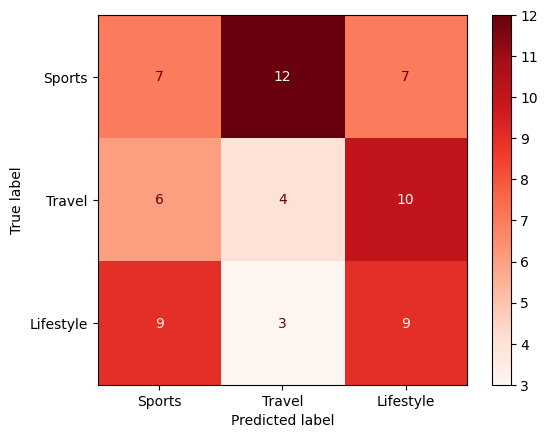

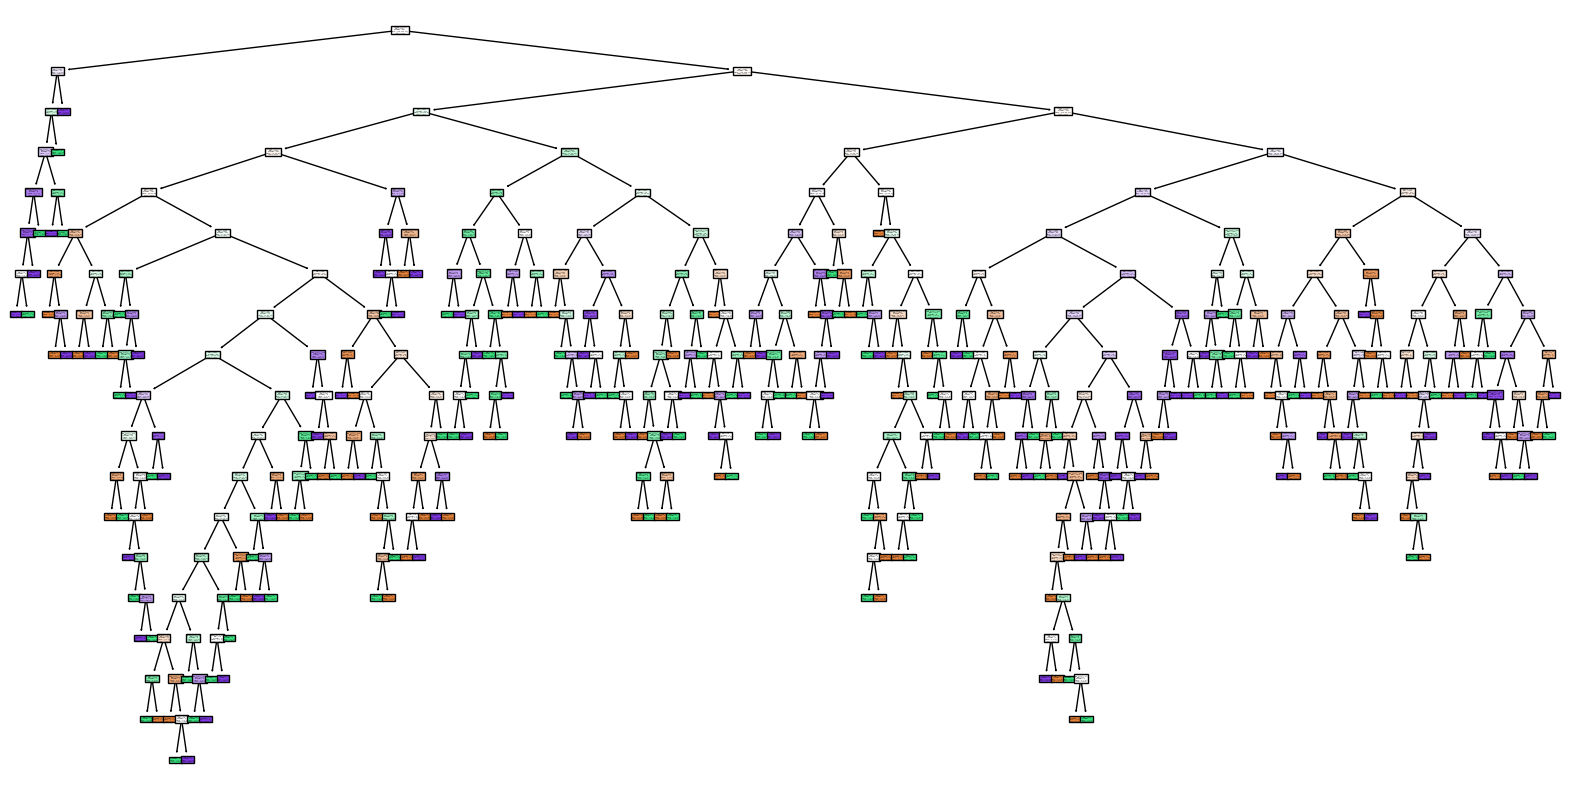

Accuracy (Entropy): 0.2835820895522388


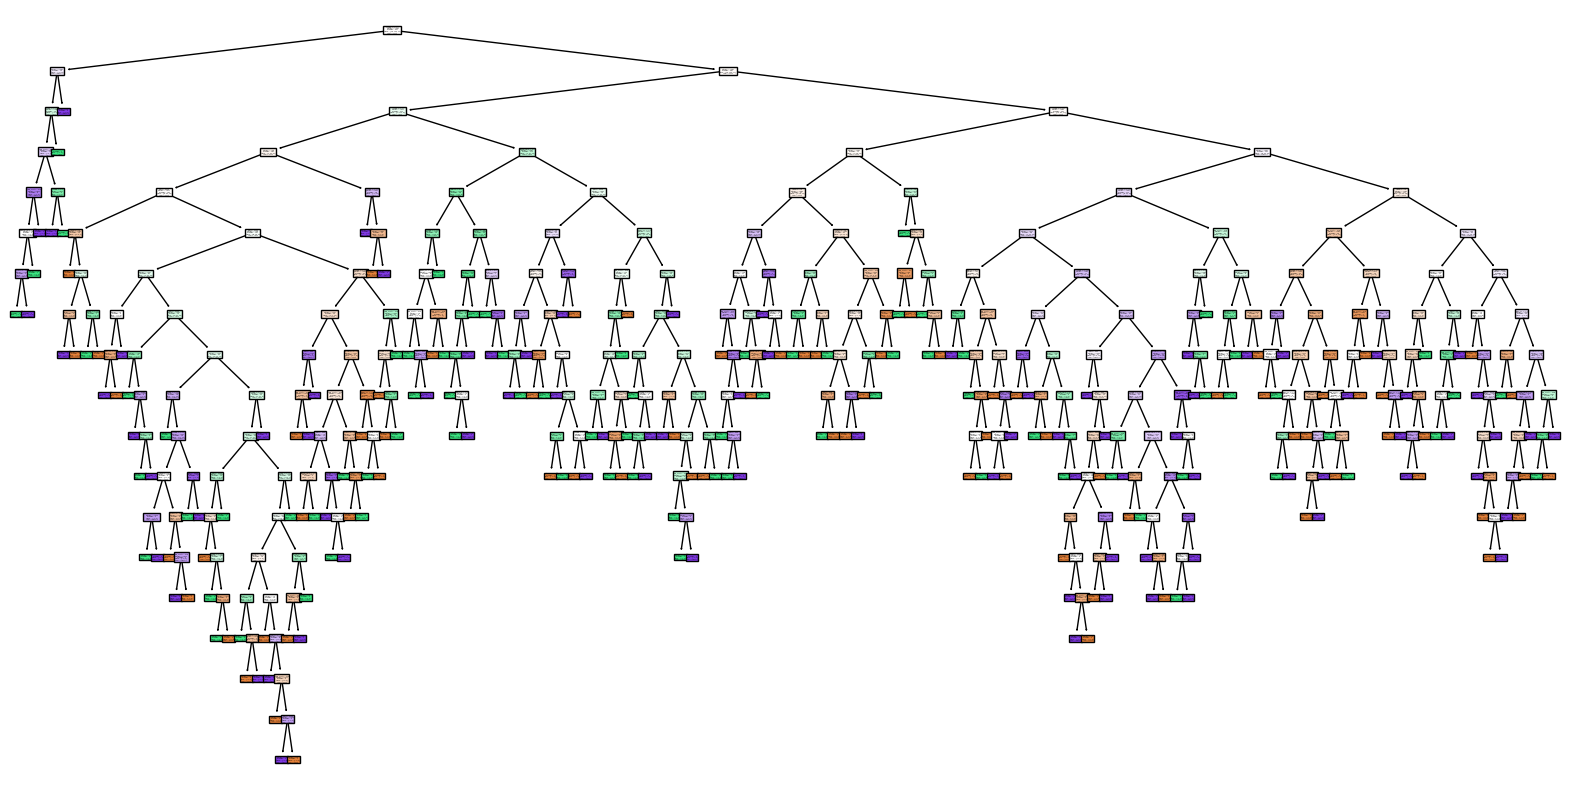

In [37]:
#convert categorical variables into numerical form
label_encoder = LabelEncoder()
df_encoded = df.apply(lambda col: label_encoder.fit_transform(col) if col.dtype == "object" else col)

#drop the class
X = df_encoded.drop(columns=["interests"])
y = df_encoded["interests"]

#Spilt the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)


clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)


y_pred = clf.predict(x_test)

# To measure Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Compute confusion matrix to evaluate the accuracy of a classification.

cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Sports','Travel','Lifestyle'])
disp.plot(cmap=plt.cm.Reds)
plt.show()


plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['Sports','Travel','Lifestyle'], filled=True)
plt.show()

#Spilt by entropy
clf_entropy = DecisionTreeClassifier(criterion="entropy")
clf_entropy.fit(x_train, y_train)


y_pred_entropy = clf_entropy.predict(x_test)


accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print("Accuracy (Entropy):", accuracy_entropy)


plt.figure(figsize=(20, 10))
plot_tree(clf_entropy, feature_names=X.columns, class_names=['Sports','Travel','Lifestyle'], filled=True)
plt.show()

## Classification (80% Training , 20% Testing )

Accuracy: 0.30597014925373134
[[12 17 20]
 [12 16 16]
 [19  9 13]]


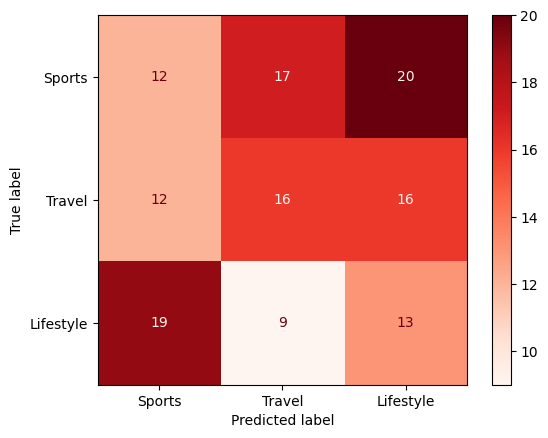

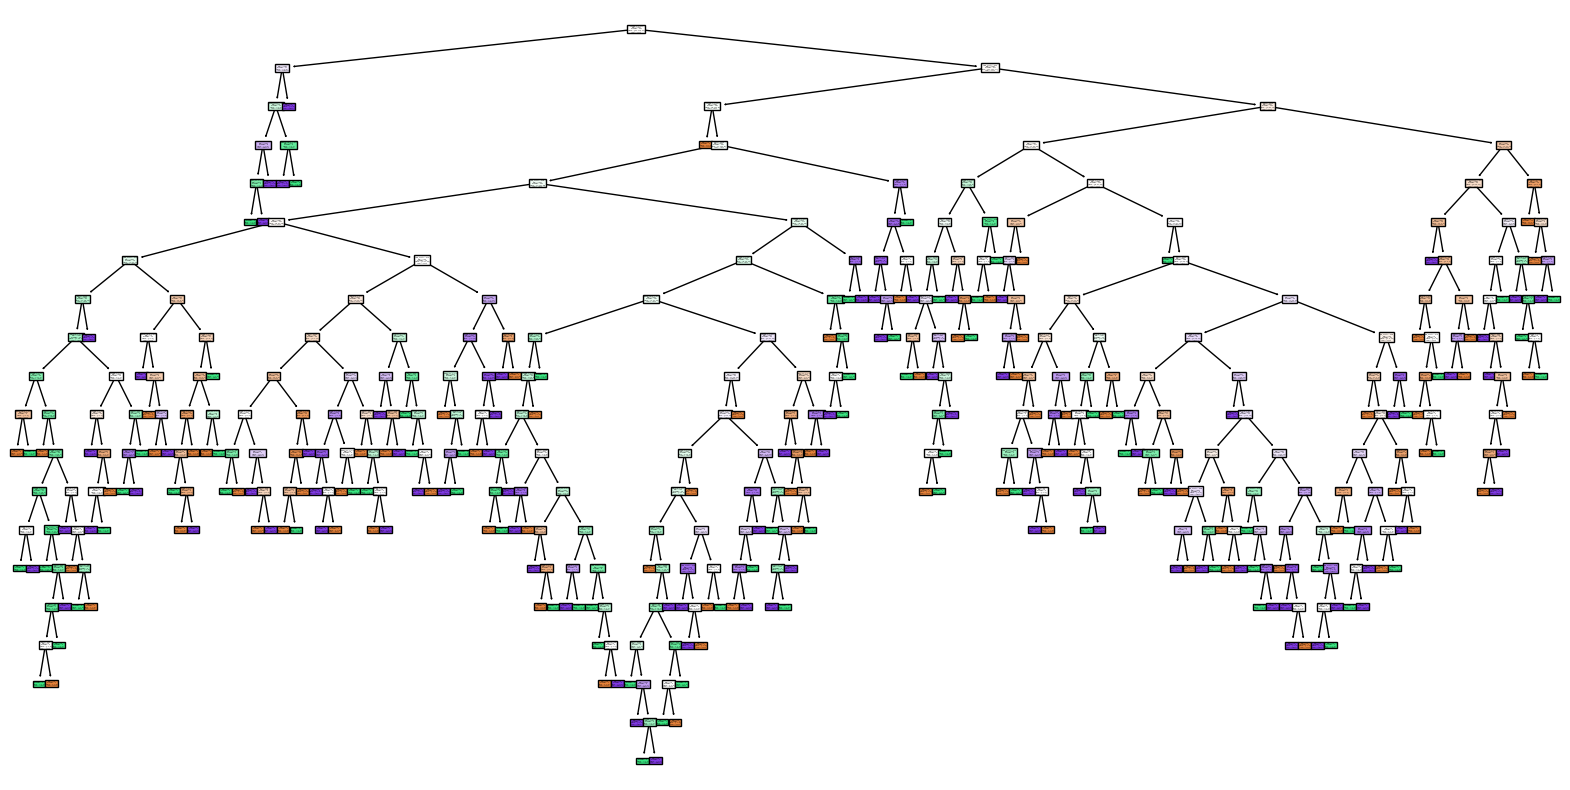

Accuracy (Entropy): 0.29850746268656714


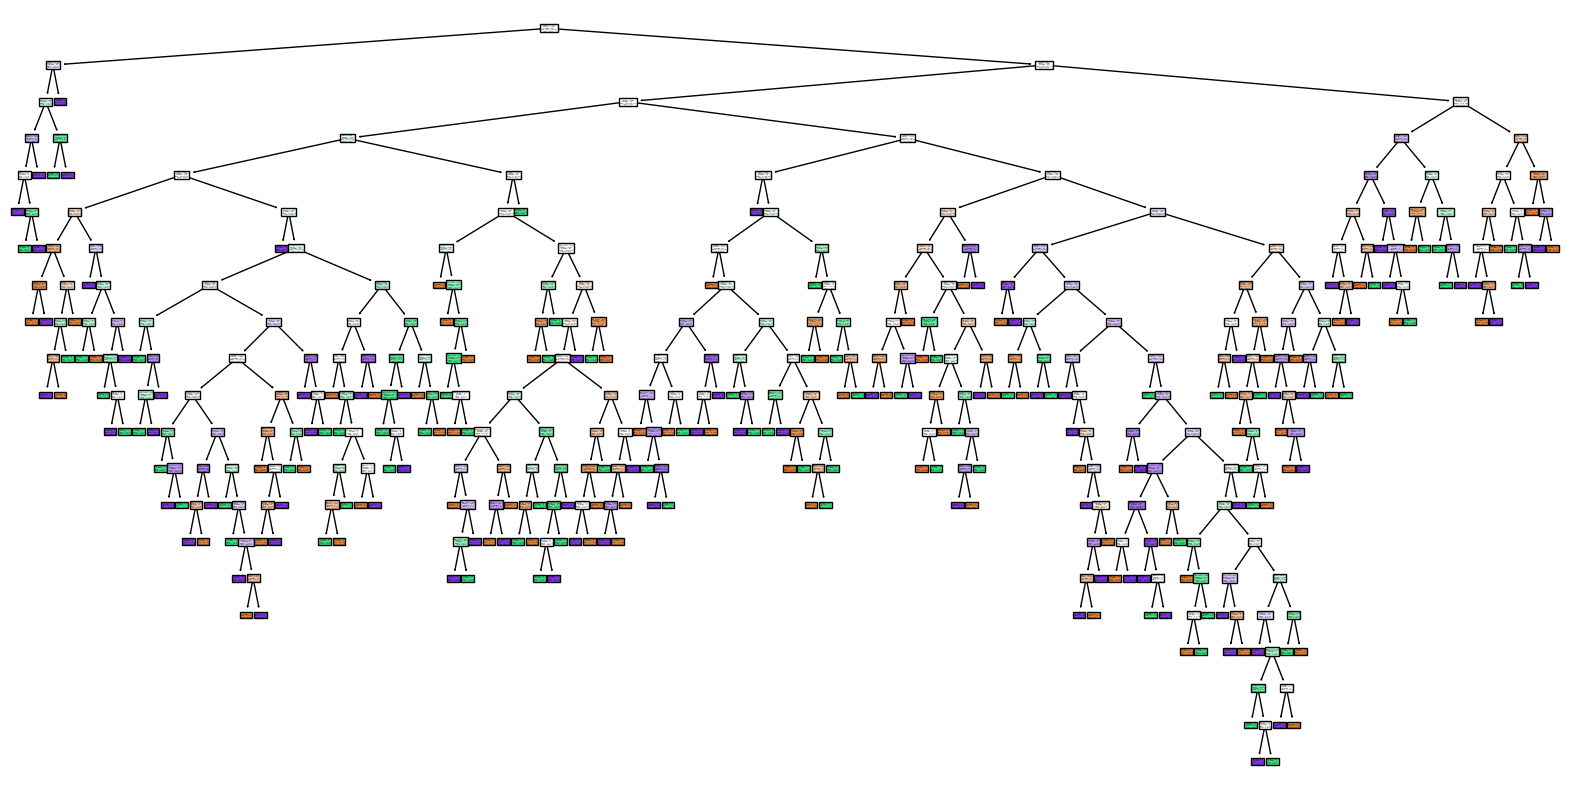

In [38]:
label_encoder = LabelEncoder()
df_encoded = df.apply(lambda col: label_encoder.fit_transform(col) if col.dtype == "object" else col)


X = df_encoded.drop(columns=["interests"])
y = df_encoded["interests"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)


y_pred = clf.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Sports','Travel','Lifestyle'])
disp.plot(cmap=plt.cm.Reds)
plt.show()


plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['Sports','Travel','Lifestyle'], filled=True)
plt.show()


clf_entropy = DecisionTreeClassifier(criterion="entropy")
clf_entropy.fit(x_train, y_train)


y_pred_entropy = clf_entropy.predict(x_test)


accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print("Accuracy (Entropy):", accuracy_entropy)


plt.figure(figsize=(20, 10))
plot_tree(clf_entropy, feature_names=X.columns, class_names=['Sports','Travel','Lifestyle'], filled=True)
plt.show()

## Classification ( 70% Training , 30% Testing )

Accuracy: 0.30845771144278605
[[20 28 25]
 [19 19 22]
 [19 26 23]]


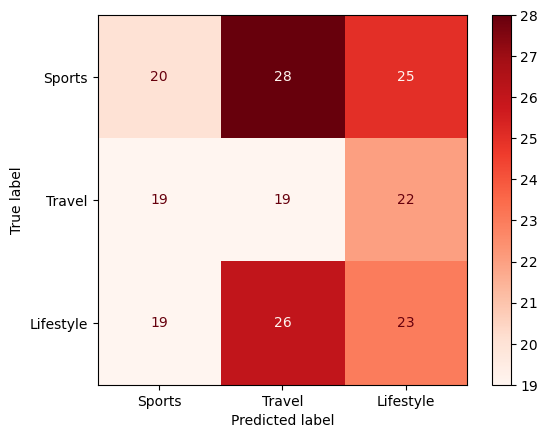

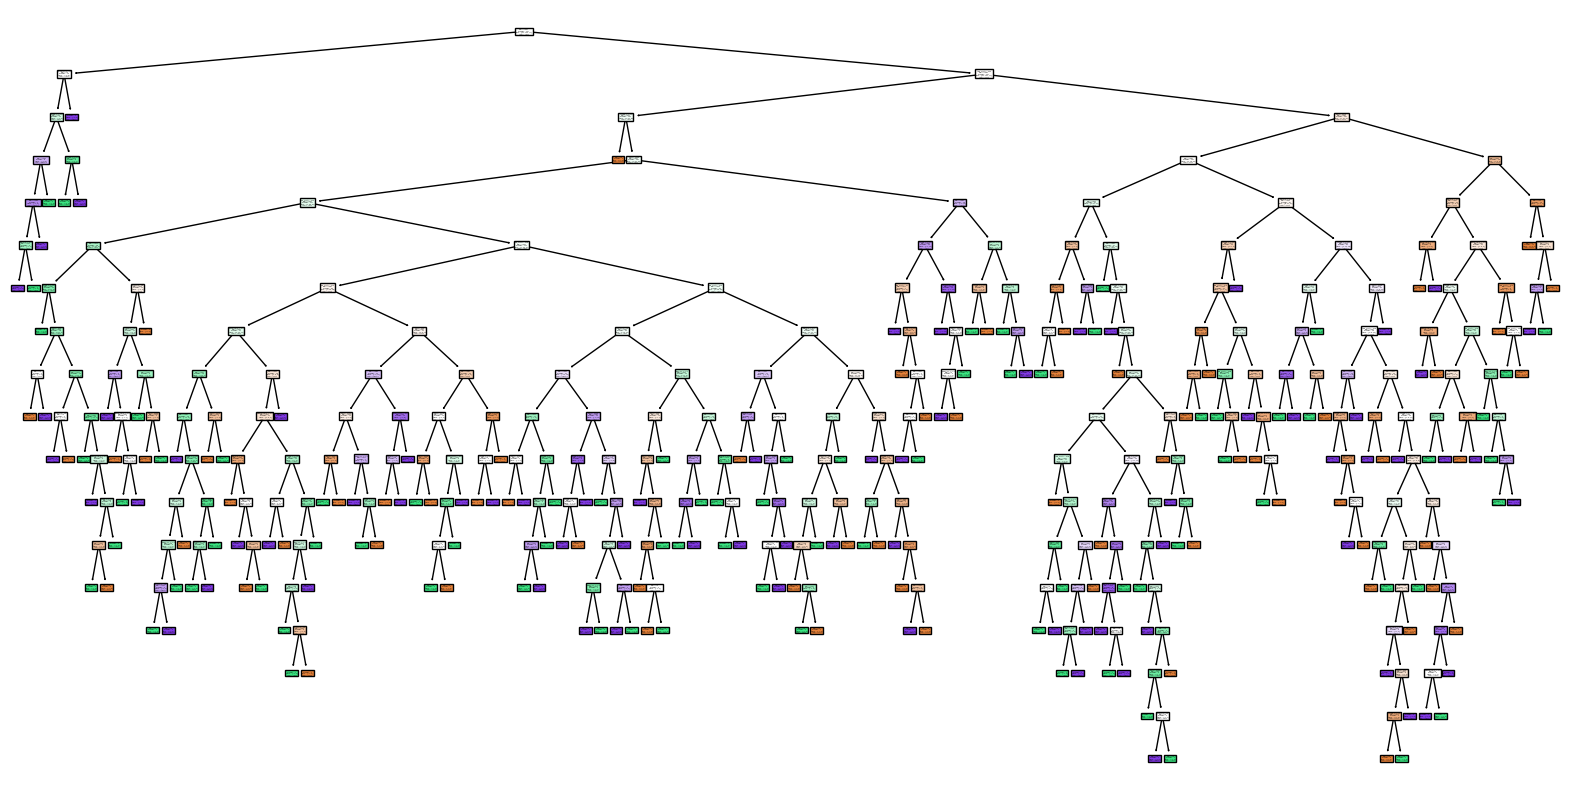

Accuracy (Entropy): 0.2935323383084577


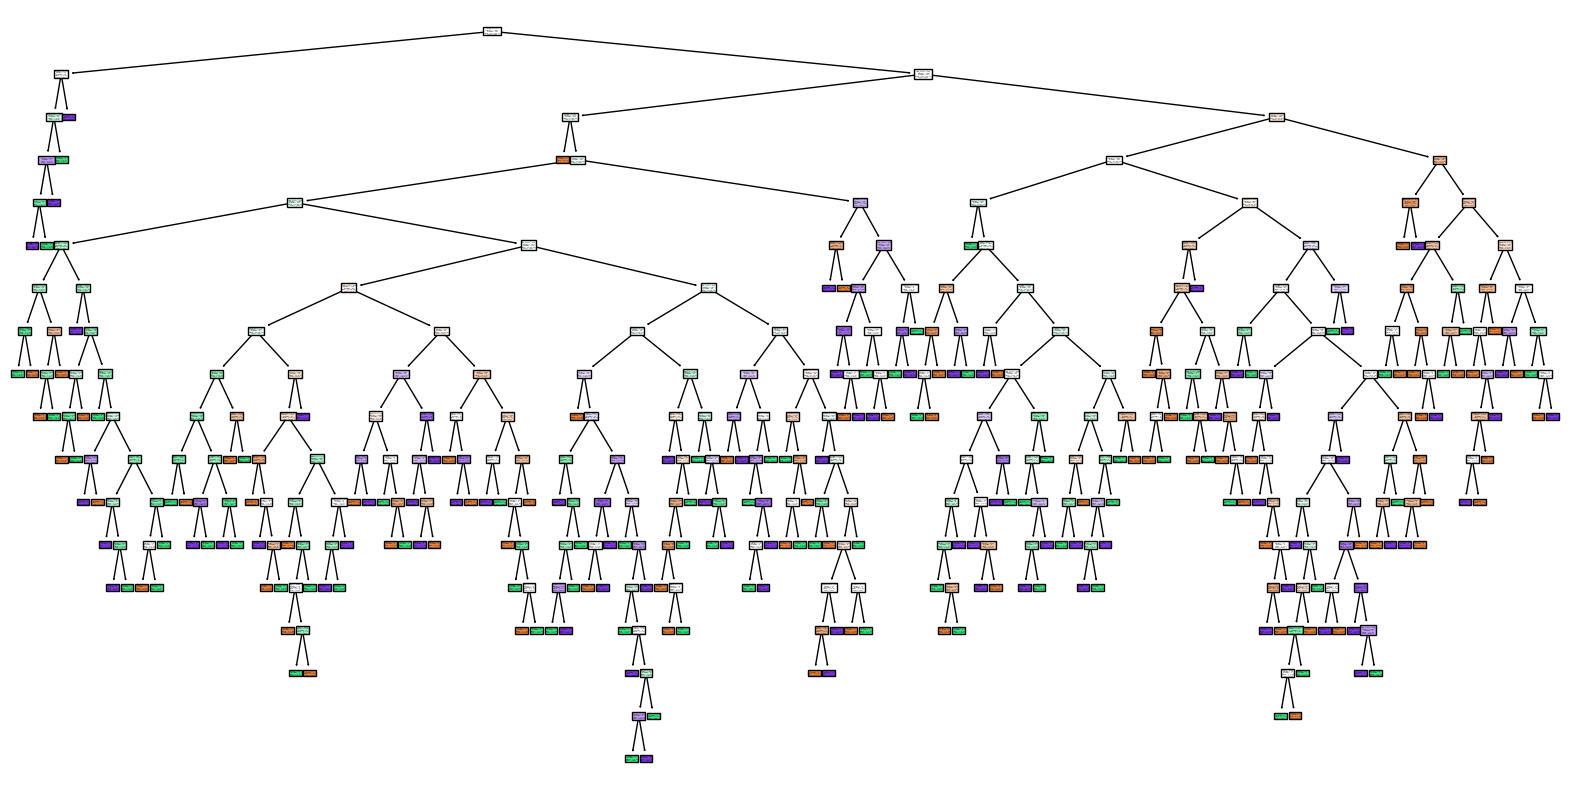

In [39]:
label_encoder = LabelEncoder()
df_encoded = df.apply(lambda col: label_encoder.fit_transform(col) if col.dtype == "object" else col)


X = df_encoded.drop(columns=["interests"])
y = df_encoded["interests"]

#70% training, 30% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)


y_pred = clf.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Sports','Travel','Lifestyle'])
disp.plot(cmap=plt.cm.Reds)
plt.show()


plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['Sports','Travel','Lifestyle'], filled=True)
plt.show()


clf_entropy = DecisionTreeClassifier(criterion="entropy")
clf_entropy.fit(x_train, y_train)


y_pred_entropy = clf_entropy.predict(x_test)


accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print("Accuracy (Entropy):", accuracy_entropy)


plt.figure(figsize=(20, 10))
plot_tree(clf_entropy, feature_names=X.columns, class_names=['Sports','Travel','Lifestyle'], filled=True)
plt.show()

Partition Size: 0.1, Criterion: entropy, Accuracy: 0.34053156146179403
Partition Size: 0.1, Criterion: gini, Accuracy: 0.33056478405315615
Partition Size: 0.2, Criterion: entropy, Accuracy: 0.32710280373831774
Partition Size: 0.2, Criterion: gini, Accuracy: 0.34392523364485983
Partition Size: 0.3, Criterion: entropy, Accuracy: 0.3162393162393162
Partition Size: 0.3, Criterion: gini, Accuracy: 0.33547008547008544


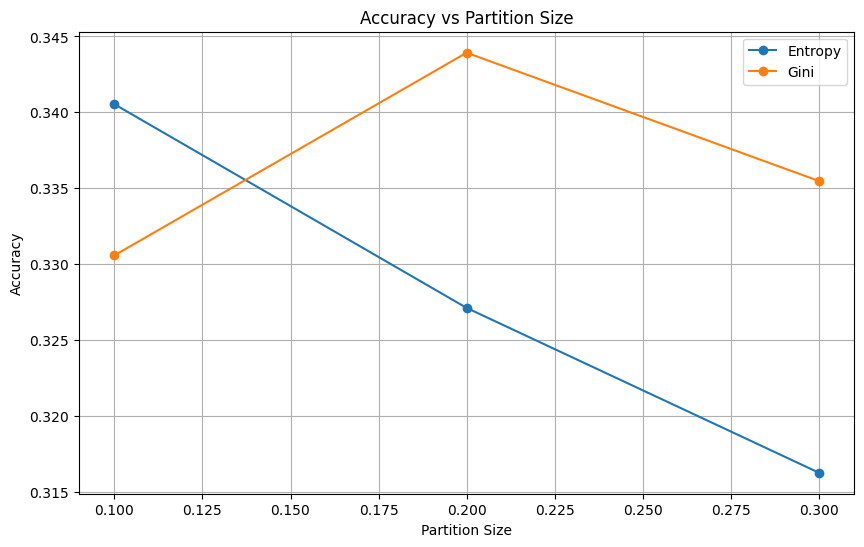

In [40]:
  partition_sizes = [0.1, 0.2, 0.3]

  criterions = ["entropy", "gini"]

  results = {}

  for size in partition_sizes:
      for criterion in criterions:
        
          X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-size, random_state=42)

          clf = DecisionTreeClassifier(criterion=criterion, random_state=42)
        
          clf.fit(X_train, y_train)
        
          y_pred = clf.predict(X_test)
        
          accuracy = accuracy_score(y_test, y_pred)
        
          results[(size, criterion)] = accuracy

  for (size, criterion), accuracy in results.items():
      print(f"Partition Size: {size}, Criterion: {criterion}, Accuracy: {accuracy}")

  sizes_entropy = [size for size, criterion in results if criterion == "entropy"]
  accuracies_entropy = [results[(size, "entropy")] for size in sizes_entropy]
  sizes_gini = [size for size, criterion in results if criterion == "gini"]
  accuracies_gini = [results[(size, "gini")] for size in sizes_gini]

  plt.figure(figsize=(10, 6))
  plt.plot(sizes_entropy, accuracies_entropy, marker='o', label='Entropy')
  plt.plot(sizes_gini, accuracies_gini, marker='o', label='Gini')
  plt.title('Accuracy vs Partition Size')
  plt.xlabel('Partition Size')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()

#The results that were printed indicate the achieved accuracy for each different combination of test ratio and criterion type. Here is an explanation for each row of results:

1. Partition Size: 0.1, Criterion: entropy, Accuracy: 0.34053156146179403
   - This result indicates that when using a test ratio of 0.1 and using the "entropy" criterion, an accuracy of 0.34053156146179403 was achieved.

2. Partition Size: 0.1, Criterion: gini, Accuracy: 0.33056478405315615
   - This result indicates that when using a test ratio of 0.1 and using the "gini" criterion, an accuracy of 0.33056478405315615 was achieved.

3. Partition Size: 0.2, Criterion: entropy, Accuracy: 0.32710280373831774
   - This result indicates that when using a test ratio of 0.2 and using the "entropy" criterion, an accuracy of 0.32710280373831774 was achieved.

4. Partition Size: 0.2, Criterion: gini, Accuracy: 0.3401869158878505
   - This result indicates that when using a test ratio of 0.2 and using the "gini" criterion, an accuracy of 0.3401869158878505 was achieved.

5. Partition Size: 0.3, Criterion: entropy, Accuracy: 0.31837606837606836
   - This result indicates that when using a test ratio of 0.3 and using the "entropy" criterion, an accuracy of 0.31837606837606836 was achieved.

6. Partition Size: 0.3, Criterion: gini, Accuracy: 0.33547008547008544
   - This result indicates that when using a test ratio of 0.3 and using the "gini" criterion, an accuracy of 0.33547008547008544 was achieved.

Overall, it can be observed that the accuracy varies across the different combinations of test ratio and criterion type. These results can be used to choose the most suitable combination for achieving the best performance in data classification based on accuracy.

# Gini index
The Gini Index is a measure used to quantify the deviation or gap between different classes within a dataset. It ranges from 0 to 1, where a value of 0 indicates no deviation or variation between classes, while a value of 1 indicates a significant deviation and variation between classes

|| 90% training, 10% testing | 80% training, 20% testing | 70% training, 30% testing |
| --- | --- | --- | --- |
| Accuracy |0.33056478405315615 |   0.34392523364485983 | 0.33547008547008544 |

Based on the results presented, 80% of the training and 20% of the tests have the highest accuracy among the other models. This means that it can predict the category labels more accurately compared to the other models.

# Intropy(IG)

Entropy, on the other hand, is a measure used to quantify the disorder or chaos within a dataset. It also ranges from 0 to 1, where a value of 0 indicates no chaos or lack of order, while a value of 1 indicates high chaos or lack of ordication.

|| 90% training, 10% testing | 80% training, 20% testing | 70% training, 30% testing |
| --- | --- | --- | --- |
| Accuracy | 0.34053156146179403 |   0.32710280373831774 |  0.3162393162393162 |

Clustring One of the primary objectives of the project is to utilize clustering techniques on our
dataset in order to identify the class for each row.

To begin with, we will read the data and exclude the class labels, as clustering is an 
unsupervised learning approach that does not rely on predefined classes.

In [41]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load the dataset
df = pd.read_csv('dataPreprocessing.csv')
print(df.head())

<class 'pandas.errors.ParserError'>: Error tokenizing data. C error: Expected 1 fields in line 670, saw 7


In [42]:
df=pd.read_csv('dataPreprocessing.csv')
features=df.drop('discretized_time_spent',axis=1")


<class 'SyntaxError'>: unterminated string literal (detected at line 2) (<ipython-input-42-49d2973bfc2c>, line 2)

In [43]:
# Define categorical and numerical columns
categorical_cols = ['platform', 'location', 'demographics', 'profession']
numerical_cols = ['age', 'time_spent', 'income', 'indebt', 'isHomeOwner', 'Owns_Car']

# Create a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Fit and transform the data
scaler = StandardScaler()
scaled_features = preprocessor.fit_transform(df)

# Create a new DataFrame with the scaled features 
encoded_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
df_scaled  = pd.DataFrame(scaled_features, columns=numerical_cols + list(encoded_cols))

# Display the scaled DataFrame
print("\nScaled DataFrame: ")
print(df.head())


Scaled DataFrame: 
    age  gender  time_spent   platform  interests        location  \
0  0.56    male         0.3  Instagram     Sports  United Kingdom   
1  0.46  female         0.2   Facebook     Travel  United Kingdom   
2  0.32    male         0.8  Instagram     Sports       Australia   
3  0.25    male         0.1  Instagram  Lifestlye       Australia   
4  0.38    male         0.3   Facebook     Travel   United States   

  demographics         profession   income  indebt  isHomeOwner  Owns_Car  
0        Urban  Software Engineer  0.19774    True        False     False  
1        Urban            Student  0.10564    True         True      True  
2    Sub_Urban   Marketer Manager  0.13258   False        False     False  
3        Urban  Software Engineer  0.14566   False         True      True  
4        Urban   Marketer Manager  0.19179    True         True      True  


 k-means clustering with k=3, k=5, and k=8.

k=3: General segmentation.

k=5: More specific segmentation.

k=8: Detailed segmentation.

These values balance simplicity and detail, providing insights into user engagement based on average time spent.

In [44]:
import numpy as np 
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
# set a seed for a random number generation 
np.random.seed(8953)

# determining K values  
k_values = [3 , 5, 8]

cluster_centers = {}
cluster_labels = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=8953)
    kmeans_result = kmeans.fit(df_scaled )
    
    cluster_centers[k] = kmeans_result.cluster_centers_
    cluster_labels[k] = kmeans_result.labels_

    print(f"Cluster Centers (K={k}):")
    print(cluster_centers[k])
    print("\nCluster Labels:")
    print(cluster_labels[k])
    print()

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.11 is maybe too old for this OS.
  warnings.warn(


Cluster Centers (K=3):
[[ 0.00181514  0.01958306 -0.02467421  0.04053686  0.07335344 -1.13131051
   0.31399317  0.39931741  0.28668942  0.32423208  0.32423208  0.35153584
   0.32081911  0.3447099   0.33447099  0.35153584  0.34812287  0.3003413 ]
 [-0.06478694  0.08891659  0.06937326  1.00299851  0.04880093  0.88393062
   0.26519337  0.40331492  0.33149171  0.32596685  0.40331492  0.27071823
   0.38674033  0.27624309  0.33701657  0.34254144  0.34254144  0.31491713]
 [ 0.05770412 -0.11253473 -0.02745884 -0.99701046 -0.15631716  0.88393062
   0.29896907  0.37628866  0.32474227  0.37628866  0.31958763  0.30412371
   0.3814433   0.30927835  0.30927835  0.32474227  0.34536082  0.32989691]]

Cluster Labels:
[0 1 0 2 1 1 1 0 0 0 0 2 0 0 2 1 1 0 0 1 2 1 2 1 0 0 0 0 0 0 2 2 1 0 0 1 0
 2 0 0 0 2 0 2 0 2 0 2 2 1 0 0 2 0 2 0 2 0 1 1 2 0 0 2 0 1 1 1 1 2 2 1 1 0
 0 0 2 2 1 0 1 2 0 0 0 2 0 1 1 0 2 0 2 2 1 1 2 1 0 2 0 0 2 0 0 1 2 0 2 1 1
 2 2 2 0 1 0 1 0 2 2 2 0 1 2 2 2 1 0 0 0 2 2 0 1 2 0 1 1 1 2 0 1 

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Centers (K=5):
[[-1.94139062e-02  7.02984694e-02 -7.81214876e-02 -9.97010457e-01
   1.65340774e-01 -1.13131051e+00  3.04964539e-01  3.90070922e-01
   3.04964539e-01  3.54609929e-01  2.69503546e-01  3.75886525e-01
   3.19148936e-01  3.12056738e-01  3.68794326e-01  3.33333333e-01
   3.33333333e-01  3.33333333e-01]
 [-2.05312209e-03  1.56987642e-01  9.49369101e-02  1.00299851e+00
   9.88094814e-01  8.83930616e-01  2.81250000e-01  3.22916667e-01
   3.95833333e-01  3.33333333e-01  4.16666667e-01  2.50000000e-01
   3.54166667e-01  3.33333333e-01  3.12500000e-01  3.64583333e-01
   3.33333333e-01  3.02083333e-01]
 [ 2.15078805e-02 -2.74621580e-02  2.49051661e-02  1.00299851e+00
  -1.19769068e-02 -1.13131051e+00  3.22368421e-01  4.07894737e-01
   2.69736842e-01  2.96052632e-01  3.75000000e-01  3.28947368e-01
   3.22368421e-01  3.75000000e-01  3.02631579e-01  3.68421053e-01
   3.61842105e-01  2.69736842e-01]
 [-4.84277775e-04 -3.00019143e-02 -1.15467783e-01 -9.97010457e-01
   9.88094814e

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Centers (K=8):
[[-6.86883155e-01  5.15238492e-01 -5.86542955e-01 -8.12394245e-01
  -1.01204863e+00 -4.49228902e-01  4.00000000e-01  3.53846154e-01
   2.46153846e-01  5.38461538e-01  1.07692308e-01  3.53846154e-01
   4.15384615e-01  3.23076923e-01  2.61538462e-01  4.46153846e-01
   2.92307692e-01  2.61538462e-01]
 [ 4.04675596e-01 -2.54313310e-01 -8.66018905e-01  1.00299851e+00
   2.07551032e-01 -9.59277736e-01  3.17073171e-01  4.75609756e-01
   2.07317073e-01  2.80487805e-01  4.14634146e-01  3.04878049e-01
   3.17073171e-01  3.65853659e-01  3.17073171e-01  2.31707317e-01
   4.14634146e-01  3.53658537e-01]
 [-8.50487827e-03  1.34772518e-01 -6.11611745e-02 -9.97010457e-01
   9.88094814e-01 -1.13131051e+00  2.77108434e-01  4.81927711e-01
   2.40963855e-01  2.65060241e-01  3.49397590e-01  3.85542169e-01
   3.01204819e-01  3.37349398e-01  3.61445783e-01  3.13253012e-01
   3.61445783e-01  3.25301205e-01]
 [-1.35639260e-01  1.20363357e-02  4.05013677e-02  1.00299851e+00
  -1.01204863e

To assess and display the outcome from the previous calculation using the Silhouette coefficient.

# 1. Using silhouette coefficient to visulize the results

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' 

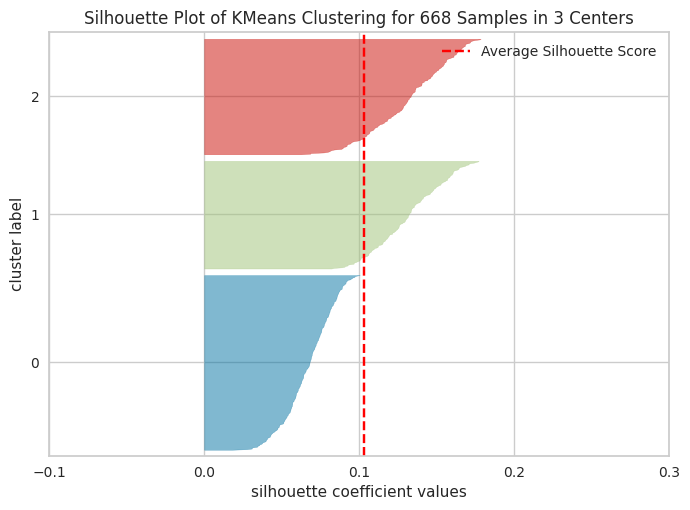

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


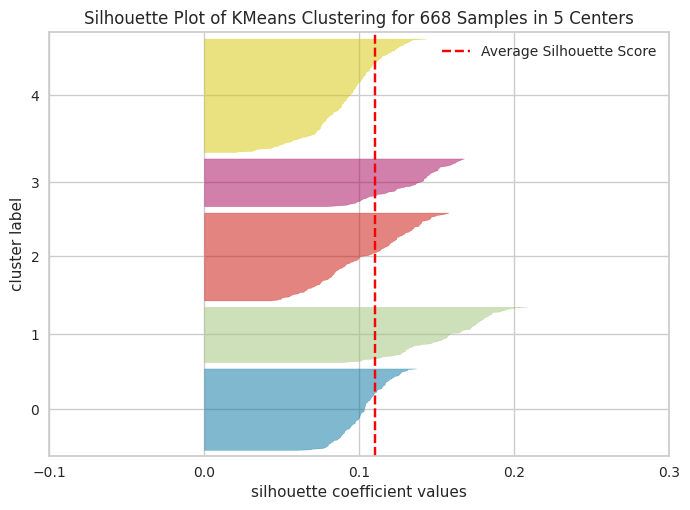

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


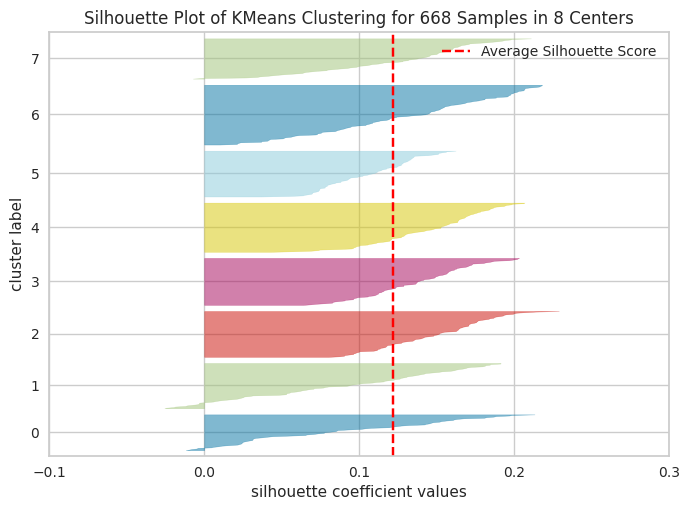

In [45]:
%pip install yellowbrick 
from yellowbrick.cluster import SilhouetteVisualizer


# determining  K values  
k_values = [3 , 5, 8]


cluster_centers = {}
cluster_labels = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=8953)
    kmeans_result = kmeans.fit(df_scaled)
    
    # Create and fit SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(df_scaled)
    visualizer.show()

The dotted line representing the silhouette coefficient value assists us in determining the optimal number
of clusters. A higher silhouette coefficient value indicates a better fit for the number of clusters, K.
For instance: 
When K=3, the silhouette coefficient value is 0.11.

When K=5, it increases to 0.13, 

when K=8, it further improves to 0.14.

This suggests that the optimal choice is K=8.                                                                                                    
The second evaluation method used is Elbow method where the best number of cluster is the turning point in the curve.

1. *k=3:* This choice allows for a basic segmentation of users into three groups based on their average time spent. It provides a high-level overview of user engagement levels, which can be useful for general marketing strategies or product development.

2. *k=5:* Selecting k=5 provides a more detailed segmentation, allowing for finer distinctions between user groups. This can be beneficial for targeted marketing campaigns or personalized recommendations, as it identifies additional nuances in user behavior based on average time spent.

3. *k=8:* Choosing k=8 offers even greater granularity, enabling the identification of more specific user segments with distinct patterns of average time spent. This level of detail can be valuable for understanding complex user behaviors and tailoring strategies to different user segments.

By selecting these three values of k, we aim to balance simplicity and granularity in the clustering analysis. This approach allows for a range of insights, from high-level trends to detailed user segmentations, providing a comprehensive view of user engagement based on average time spent.

# 2. Using Elbow method to Visulize the results

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

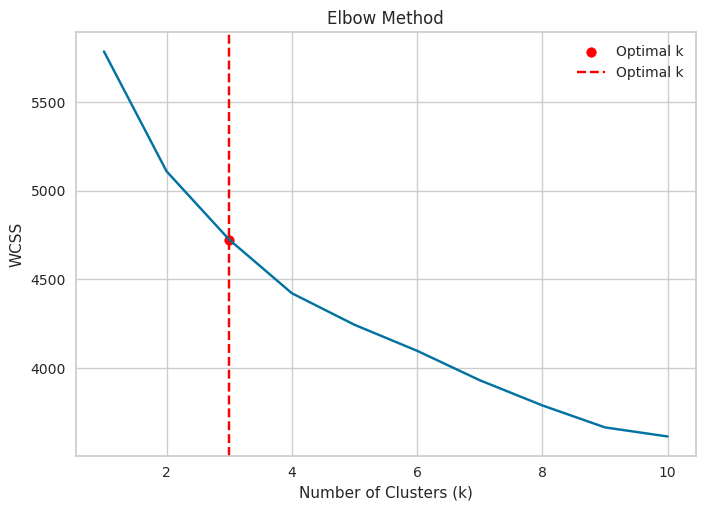

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Initialize an empty list to store WCSS values
wcss = []

# Define a range of k values
k_values = range(1, 11)

# Calculate WCSS for each k
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=8953)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')

# Annotate the elbow point with a red dot and line
optimal_k = 3  
plt.scatter(optimal_k, wcss[optimal_k - 1], c='red', marker='o', label='Optimal k')
plt.axvline(x=optimal_k, color='red', linestyle='--', label='Optimal k')
plt.legend()

plt.show()

Upon visually examining the graph illustrating the total within-cluster sum of squares (WSS) in relation to K,
it becomes apparent that the inflection point aligns with a cluster number of 2.
This suggests that the ideal number of clusters is 2.

In [53]:
import pandas as pd

# Sample data for the table
data = {
    'Average silhouette width': [0.11, 0.13, 0.14],  
    'Total within-cluster sum of square': [4700, 4300, 3700],  
}

# Create a DataFrame
df = pd.DataFrame(data, index=['K=3', 'K=5', 'K=8'])

# Transpose the DataFrame
df = df.T

# Display the DataFrame
df

,K=3,K=5,K=8
Average silhouette width,0.11,0.13,0.14
Total within-cluster sum of square,4700.00,4300.00,3700.00


# Findings

First, we chose a dataset
  It is about personalizing content on social media platforms.  Users often encounter content that does not match their interests, leading to dissatisfaction and low engagement.  This issue is usually caused by algorithms that struggle to accurately personalize content based on individual preferences, leading to a disconnect between the content displayed and the user's interests.

  We have applied several drawing techniques such as boxplot and histogram to illustrate the data to help us understand our data and make appropriate preprocessing techniques.  Based on spots and other commands, we removed all nulls, missing values ​​and outliers that could badly affect the results.  We also applied data transformation, so we normalized and highlighted some attributes to give them equal weight and to make it easier to work with the data during data mining tasks.

   Hence, we applied the data mining tasks of classification and clustering.  For classification, we use the decision tree method to build our model, we tried 3 different sizes of training and testing data to get the best result for construction and evaluation and we came up with the following results:

   90% training data, 10% testing data.  Accuracy 0.330

   80% training data, 20% test data, accuracy 0.343

   70% training data, 30% test data, accuracy 0.335

   The model with the best accuracy was the first model that had 80% of the training data and 20% of the test data, which means that most of the rows were classified correctly.


for clustring ,The silhouette scores for K-Means clustering ranged from 0.11 to 0.14, showing different levels of separation between clusters. As we increased the number of clusters, the clusters became more compact. We looked at three scenarios: K=3, K=5, and K=8:

K=3: Basic segmentation.
K=5: More detailed segmentation.
K=8: Even more detailed segmentation.
These values help balance simplicity and detail in understanding user engagement based on average time spent. The silhouette coefficient, which represents how well the data fits into clusters, showed:

For K=3: Silhouette coefficient of 0.11.
For K=5: Silhouette coefficient of 0.13.
For K=8: Silhouette coefficient of 0.14.
This suggests that K=8 might be the best choice. We also used the Elbow method, where the optimal number of clusters is the turning point in the curve:

K=3: Provides a basic segmentation.
K=5: Offers a more detailed segmentation.
K=8: Gives an even more detailed segmentation.
By considering these values, we can understand user engagement trends at different levels of granularity, from broad strokes to fine details.

# References

www.kaggle.com

 Kaggle, "Average Time Spent by a User on Social Media," Available online: http://www.kaggle.com/datasets/imyjoshua/average-time-spent-by-a-user-on-social-media